<h1>Problem Set 4</h1> 
<h3><center>Quantitative Macro</center></h3>

<center>Pau Belda-i-Tortosa</center>,

<center>October 2018</center>

<h3>Question 1: Value function iteration.</h3>

*Pose the recursive formulation of the sequential problem without productivity shocks. Discretize the state space and the value function and solve for it under the computational variants listed below.*

**Question 1.1. Recursive problem**

The Recursive formulation of the sequential problem looks as follows: 

(1) $V(k) = max_{k' \epsilon [0, y + (1-\delta)k]} u (k^{(1-\theta)} + (1-\delta)k - k') + \beta V(k')$

Note that (1) labor is ineslastically supply, (2) there is no uncertainty and (3) there is perfect aggregation (then, the Fundamental Welfare Theorem holds and we can work with a single individual that stands for the whole economy). 


**a) Brut Force iterations**

Program Executed in 7.65
Number of iterations: 99


Text(0,0.5,'Utility')

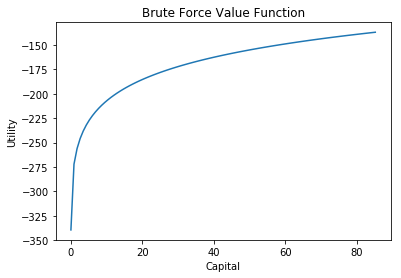

In [2]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import timeit
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

#Set the parameters value
beta=0.988   
theta=.679
delta=.013
kappa=5.24
nu=2
start = timeit.default_timer()

# STEP 1: DISCRETIZE THE STATE SPACE. 
k_ss=(1/(1-theta)*((1/beta)+delta-1))**(-1/theta)
k=np.linspace(0.01,1.5*k_ss,100)#evenly spaced grid. 

#STEP 2: Initial guess
#Define a matrix which column vectors are sequential iterations of the value function. 
V = np.empty(shape=[100, 350])
#Guess the initial column vector
V[:,0]=np.zeros((100))


#STEP 3: Feasible return matrix (M).
# Get the grid of all possible combinations of inputs. 
Z1,Z2=np.meshgrid(k,k)

# Feasible combinations
def feasibility(z1,z2):
    return z1**(1-theta) + (1-delta)*z1 - z2

#Evaluate the feasibility of different combinations of k_t and k_t+1.
N = feasibility(Z1,Z2)

# Feasible utility function
def utility(z1,z2):
    for i in range(100):
        for j in range (100):
                if N[i,j]>=0:
                    return np.log10(z1**(1-theta) + (1-delta)*z1 - z2) - (kappa/(1+(1/nu)))
            
#Define the feasible return matrix
M = utility(Z1,Z2)
M[np.isnan(M)] = -100

#STEP 4: VALUE FUNCTION MATRIX ITERATION
X = np.empty(shape=[100, 100])
G= np.empty(shape=[100, 350])
count=0
for s in range(0,349):
    epsilon=0.01
    for i in range(100):
        for j in range(100):
                X[i,j]=M[i,j]+(beta*V[:,s][j])        
    for i in range(0,100):
        V[:,s+1][i]= np.amax(X[:,i]) #Iteration
        G[:,s][i]=np.argmax(X[:,i]) # This line stores the policy function at each iteration. 
        for i in range(0,100):
            if abs(V[:,s+1][i]-V[:,s][i])> epsilon:
                continue
            else:
                count +=1
                break

stop = timeit.default_timer()
execution_time = stop - start
execution_time=round(execution_time,2)
print('Program Executed in', execution_time) #It returns time in sec
print('Number of iterations:', count)

#STEP 6: PLOT 
k=np.linspace(0.01,2*k_ss,100)
plt.plot(k,V[:,349])
plt.title('Brute Force Value Function')
plt.xlabel('Capital')
plt.ylabel('Utility')

The value function is reaching a fixed point in 7.65 seconds and 99 iterations. It shows decreasing returns w.r.t. capital. It takes very negative values because the RA is not having leisure. 

**b) Monotonicity of the policy function.**

Program Executed in 6.35


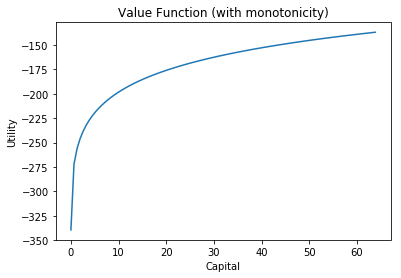

In [25]:
start = timeit.default_timer()

#STEP 4    
X = np.empty(shape=[100, 100])
G= np.empty(shape=[100, 350])
count=0
for s in range(0,349):
    epsilon=0.01
    for i in range(100):
        for j in range(100):
            if j >= G[:,s+1][i]: #Monotonicity
                X[i,j]=M[i,j]+(beta*V[:,s][j])        
    for i in range(0,100):
        V[:,s+1][i]= np.amax(X[:,i]) #Iteration
        G[:,s][i]=np.argmax(X[:,i]) # This line stores the policy function at each iteration. 
    for i in range(0,100):
        if abs(V[:,s+1][i]-V[:,s][i])> epsilon:
            continue
        else:
            count +=1
            break
                
stop = timeit.default_timer()
execution_time = stop - start
execution_time=round(execution_time,2)
print('Program Executed in', execution_time) #It returns time in sec
#print('Number of iterations:', count)

#STEP 5: PLOT
k1=np.linspace(0.01,1.5*k_ss,100)
plt.plot(k1,V[:,349])
plt.title('Value Function (with monotonicity)')
plt.xlabel('Capital')
plt.ylabel('Utility')
#plt.xlim([0,90])
#plt.ylim([0,45])
plt.show()

Using monotonicity, we reach the same value function a bit faster. However, the improvement is not relevant (from 7 to 6 seconds). 

**c) Concavity of the Value Function.**

Program Executed in 4.67
Number of iterations: 349


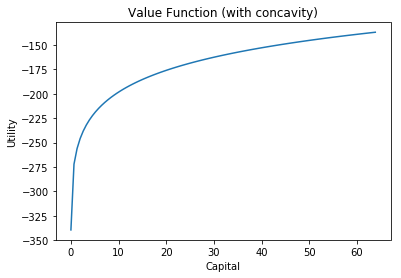

In [17]:
start = timeit.default_timer()

#STEP 4   
V1=np.empty(shape=[100, 350])
X1 = np.empty(shape=[100, 100])
G= np.empty(shape=[100, 350])
count=0
for s in range(0,349):
    epsilon=0.01
    for i in range(100):
        for j in range(100):
            if X1[i,j-1]<X1[i,j]: #Concavity
                X1[i,j]=M[i,j]+(beta*V[:,s][j])        
    for i in range(0,100):
        V1[:,s+1][i]= np.amax(X1[:,i]) #Iteration
        G[:,s][i]=np.argmax(X1[:,i]) # This line stores the policy function at each iteration. 
    for i in range(0,100):
        if abs(V1[:,s+1][i]-V1[:,s][i])> epsilon:
            continue
        else:
            count +=1
            break
                
stop = timeit.default_timer()
execution_time = stop - start
execution_time=round(execution_time,2)
print('Program Executed in', execution_time) #It returns time in sec
print('Number of iterations:', count)

#STEP 5: PLOT
k1=np.linspace(0.01,1.5*k_ss,100)
plt.plot(k1,V[:,349])
plt.title('Value Function (with concavity)')
plt.xlabel('Capital')
plt.ylabel('Utility')
#plt.xlim([0,90])
#plt.ylim([0,45])
plt.show()

Using the concavity property, we reach our fixed point faster (4.67 seconds rather than 7.65), which is a good improvement. 

** d) Local search**

Program Executed in 5.85
Number of iterations: 349


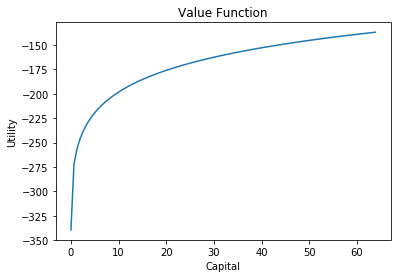

In [16]:
start = timeit.default_timer()

#STEP 4': VALUE FUNCTION MATRIX ITERATION
V1 = np.empty(shape=[100, 350])
V1[:,0]=np.zeros((100))
G1 = np.empty(shape=[100, 350])
X1 = np.empty(shape=[100, 350]) 
count3=0
for s in range(0,349):
    epsilon=0.01
    for i in range(99):
        for j in range(100):
            if j==G1[:,s+1][i+1] or j==G1[:,s+1][i-1]: #Restrict the search to neighbour points. 
                X1[i,j]=M[i,j]+(beta*V1[:,s][j])
                X1[np.isnan(X1)] = 0 
    for i in range(0,100):
        V1[:,s+1][i]= np.amax(X1[i,:])
        G1[:,s]=np.argmax(X1[i,:])
    for i in range(0,100):
        if abs(V1[:,s+1][i]-V1[:,s][i])< epsilon:
            count3 +=1
            break
        else:
            continue

stop = timeit.default_timer()
execution_time = stop - start
execution_time=round(execution_time,2)
print('Program Executed in', execution_time) 
print('Number of iterations:', count3)

#STEP 5: PLOT
k1=np.linspace(0.01,1.5*k_ss,100)
plt.plot(k1,V[:,349])
plt.title('Value Function')
plt.xlabel('Capital')
plt.ylabel('Utility')
#plt.xlim([0,50])
#plt.ylim([0,45])
plt.show()


Using local search we improve the time, but still need much more iterations than with the brute force method. 

** e) Monotonicity and concavity**

Program Executed in 4.49
Number of iterations: 349


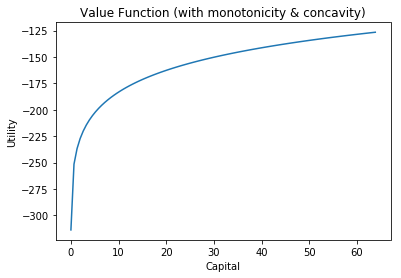

In [21]:
start = timeit.default_timer()

#STEP 4   
V1=np.empty(shape=[100, 350])
X1 = np.empty(shape=[100, 100])
G= np.empty(shape=[100, 350])
count=0
for s in range(0,349):
    epsilon=0.01
    for i in range(100):
        for j in range(100):
            if j >= G[:,s+1][i]: #Monotonicity
                if X1[i,j-1]<X1[i,j]: #Concavity
                    X1[i,j]=M[i,j]+(beta*V[:,s][j])        
    for i in range(0,100):
        V1[:,s+1][i]= np.amax(X1[:,i]) #Iteration
        G[:,s][i]=np.argmax(X1[:,i]) # This line stores the policy function at each iteration. 
    for i in range(0,100):
        if abs(V1[:,s+1][i]-V1[:,s][i])> epsilon:
            continue
        else:
            count +=1
            break
                
stop = timeit.default_timer()
execution_time = stop - start
execution_time=round(execution_time,2)
print('Program Executed in', execution_time) #It returns time in sec
print('Number of iterations:', count)

#STEP 5: PLOT
k1=np.linspace(0.01,1.5*k_ss,100)
plt.plot(k1,V[:,200])
plt.title('Value Function (with monotonicity & concavity)')
plt.xlabel('Capital')
plt.ylabel('Utility')
#plt.xlim([0,90])
#plt.ylim([0,45])
plt.show()

Using both, monotonicity and concavity, we speed up our initial method, but again, the number of iterations is larger. Note that the code has 2 additional statements in the for loop. 

**Comments on the results**:
With the brute force VFI we get our VF with a little number of iterations and it didn't take too much. The other methods introduces more loops in the algorithm and then, there is a trade off between the speed and the number of iterations. Since there is no a very clear net gain, from now on we will use brute force VFI for the rest of the PS. 

** Question 1.2. Continuous Labor**



Program Executed in 22.3
Number of iterations: 349


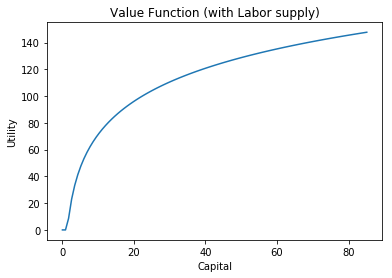

In [2]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt
import timeit
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

#Set the parameters value
beta=0.988   
theta=.679
delta=.013
kappa=5.24
nu=2
start = timeit.default_timer()

# STEP 1: DISCRETIZE THE STATE SPACE. 
k_ss=(1/(1-theta)*((1/beta)+delta-1))**(-1/theta)
k=np.linspace(0.01,1.5*k_ss,100)#evenly spaced grid. 
h=np.linspace(0,1,5)

#STEP 2: Initial guess
#Define a matrix which column vectors are sequential iterations of the value function. 
V = np.empty(shape=[100, 350])
#Guess the initial column vector
V[:,0]=np.zeros((100))


#STEP 3: Feasible return matrix (M).
# Get the grid of all possible combinations of inputs. 
Z1,Z2,H =np.meshgrid(k,k,h)

# Feasible combinations
def feasibility(z1,z2,h):
    return (z1**(1-theta))*(h**theta) + (1-delta)*z1 - z2

#Evaluate the feasibility of different combinations of k_t and k_t+1.
N = feasibility(Z1,Z2,H)

# Feasible utility function
def utility(z1,z2,h):
       for i,j,m in zip(range(0,100),range(0,100),range(0,5)):
        if N[i,j,m]>=0:
            return np.log10(z1**(1-theta)*(h**theta) + (1-delta)*z1 - z2) - (kappa/(1+(1/nu)))*(h**(1+(1/nu)))
   
            
#Define the feasible return matrix
M = utility(Z1,Z2,H)
np.shape(M)
M[np.isnan(M)] = 0

#STEP 4: VALUE FUNCTION MATRIX ITERATION
X = np.empty(shape=[100, 100, 5])
G= np.empty(shape=[100, 350])
count=0
for s in range(0,349):
    epsilon=0.01
    for i in range(100):
        for j in range(100):
            for m in range(5):
                X[i,j,m]=M[i,j,m]+(beta*V[:,s][j])
    for i in range(0,100):
        V[:,s+1][i]= np.amax(X[:,i]) #Iteration
        G[:,s][i]=np.argmax(X[:,i]) # This line stores the policy function at each iteration. 
    for i in range(0,100):
        if abs(V[:,s+1][i]-V[:,s][i])< epsilon:
            count +=1
            break
        else:
            continue


stop = timeit.default_timer()
execution_time = stop - start
execution_time=round(execution_time,2)
print('Program Executed in', execution_time) #It returns time in sec

#STEP 6: PLOT 
k=np.linspace(0.01,2*k_ss,100)
plt.plot(k,V[:,349])
plt.title('Value Function (with Labor supply)')
plt.xlabel('Capital')
plt.ylabel('Utility')
#plt.xlim([0,90])
#plt.ylim([0,45])
print('Number of iterations:', count)

Once we introduce leisure (so $h_t$ is not necessarily 1 anymore), the utility we got is positive. However, since we have an additional control variable, it takes much more time to reach the fixed point. 


** Question 1.3. Chebyshev regression algorithm **

(We follow Makoto Nakajima notes)


Program Executed in 0.26
Number of iterations: 100


Text(0.5,1,'Chebyshev approximation')

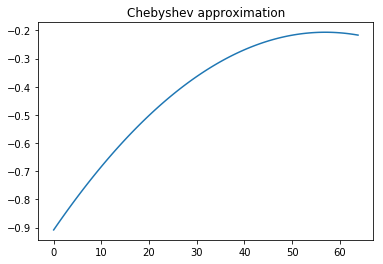

In [23]:
#VFI with Chebyshev regression (we follow Makoto Nakajima notes)

import numpy as np
import matplotlib.pyplot as plt
import timeit
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

#STEP 1: Set the order of polynomials used for approximation.
n=2

#STEP 2: Set the tolerance parameter
epsilon=0.01

#STEP 3: Upper and lower bound of the discrete space state
beta=0.988   
theta=.679
delta=.013
kappa=5.24
nu=2
k_ss=(1/(1-theta)*((1/beta)+delta-1))**(-1/theta)
k=np.linspace(0.01,1.5*k_ss,100)#evenly spaced grid. 

#STEP 4: Compute the collocations nodes. 
# a) Cheby nodes [-1,1]
nodes=[]
for i in range(100):
    q=np.cos((((2*i)-1)/200)*np.pi)
    nodes.append(q)
nodes=np.asarray(nodes)

#b) Adjust the nodes to the [k0,1.5*k_ss] interval:
nod=[]
for i in range(100):
    q=((nodes[i])*((1.5*k_ss - k[0])/2))+ (((1.5*k_ss + k[0])/2))
    nod.append(q)
nod=np.asarray(nod)
    
#STEP 5: Guess for the level of the value function at the points
y0=np.ones(100)

#STEP 5: Get the Chebyshev coefficients
coefficients=np.polynomial.chebyshev.chebfit(nod,y0,n)

#STEP 6: Value function guess
V0=np.polynomial.chebyshev.chebval(k,coefficients)

#STEP 7: Get the policy function
#7.1. Get the feasible return matrix M

Z1,Z2=np.meshgrid(k,k)
def feasibility(z1,z2):
    return z1**(1-theta) + (1-delta)*z1 - z2
N = feasibility(Z1,Z2)
def utility(z1,z2):
    for i,j in zip(range(0,100),range(0,100)):
        if N[i,j]>=0:
            return np.log10(z1**(1-theta) + (1-delta)*z1 - z2) - (kappa/(1+(1/nu)))
        else:
            return -1000
M = utility(Z1,Z2)

#7.2. Get the policy function
X = np.empty(shape=[100, 100])
G0=np.empty(shape=[100,1])
for i,j in zip(range(0,100),range(0,100)):
    X[i,j]=M[i,j]+(beta*V0[j])
    X[np.isnan(X)] = -1000    
for i in range(0,100):
    G0[i]=np.argmax(X[i,:]) 

#STEP 8: Update the value function
y1=np.empty(shape=[100,1])
for i in range(0,100):
    y1[i]=utility(k[i],G0[i])+(beta*V0[i])
y1[np.isnan(y1)] = 0
y1=np.reshape(y1, (100,))

#STEP 9: New guess for the coefficients
coefficients1=np.polynomial.chebyshev.chebfit(nod,y1,n)


#STEP 10: Compare the coefficients:
d=np.amax(abs(coefficients - coefficients1))

#Since the maximum distance is higher than the tolerance level, we go back to step 6. We need a loop.
start = timeit.default_timer()
count=0
epsilon=0.01
while d>epsilon and count<100:
    V=np.polynomial.chebyshev.chebval(k,coefficients1) #VF guess
    for i in range(100):
        for j in range(100):
            X[i,j]=M[i,j]+(beta*V[j])
            X[np.isnan(X)] = -1000     
        for i in range(0,100): #Policy function
            G0[i]=np.argmax(X[i,:]) 
        for i in range(0,100): #Update the value function
            y1[i]=utility(k[i],G0[i])+(beta*V[i])
            y1[np.isnan(y1)] = 0
            y1=np.reshape(y1, (100,))        
        coefficients1=np.polynomial.chebyshev.chebfit(nod,y1,n)
        d=np.amax(abs(coefficients - coefficients1))
        count +=1

stop = timeit.default_timer()
execution_time = stop - start
execution_time=round(execution_time,2)
print('Program Executed in', execution_time) #It returns time in sec
print('Number of iterations:', count)


plt.plot(k,V)
#plt.xlim([0,40])
plt.title('Chebyshev approximation')

With the Chebyshev algorithm we get the concave function we are looking for, with the negative utility values. Moreover, this algorithm is faster (0.26 seconds) and uses less iterations. The con is that the levels of utility are much less negative than they should. 

<h3>Question 2: Business cycle fluctuations.</h3>
    

**Question 2.1.: Productivity shocks**

Recursive problem (social planner): 

(1) $V(k) = max_{k' \epsilon [0, y + (1-\delta)k]} u (k^{(1-\theta)}h^\theta + (1-\delta)k - k') + \beta [0.5 V(k',z^g) + 0.5 V(k',z^b)]$

where $z^g$ and $z^b$ are standing for good and bad shock, respectively. Note that this is the **stochastic version with labor supply.** 

Program Executed in 6.97
Number of iterations: 335


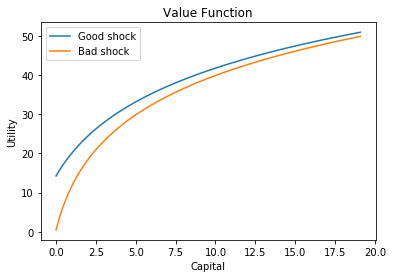

In [6]:
#STOCHASTIC, NO LABOR

#Import packages
import numpy as np
import matplotlib.pyplot as plt
import timeit
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

#Set the parameters value
beta=0.988   
theta=.679
delta=.013
kappa=5.24
nu=2
start = timeit.default_timer()

# STEP 1: DISCRETIZE THE STATE SPACE. 
#Get the steady state values. h_ss=0.299
k_ss=((1/(1-theta)*((1/beta)+delta-1))**(-1/theta))*0.299
k=np.linspace(0.01,1.5*k_ss,100)#evenly spaced grid. 
z=[1.01, 1/1.01] #Shock grid

#STEP 2: Initial guess
#Define a matrix which column vectors are sequential iterations of the value function. 
V = np.empty(shape=[200, 350])
#Guess the initial column vector
V[:,0]=np.zeros((200))


#STEP 3: Feasible return matrix (M).
# Get the grid of all possible combinations of inputs. 
K1,K2 =np.meshgrid(k,k)

# Get the submatrix M for z=1.01
# Feasible combinations
def feasibility0(z1,z2):
    return (z1**(1-theta))*1.01 + (1-delta)*z1 - z2

#Evaluate the feasibility of different combinations of k_t and k_t+1.
N0 = feasibility0(K1,K2)

# Feasible utility function
def utility0(z1,z2):
    for i in range(100):
        for j in range (100):
                if N0[i,j]>=0:
                    return np.log10(z1**(1-theta)*1.01 + (1-delta)*z1 - z2)
            
#Define the feasible return matrix
M0 = utility0(K1,K2)
M0[np.isnan(M0)] = -100

# Get the submatrix M for z=1/1.01
# Feasible combinations
def feasibility1(z1,z2):
    return (z1**(1-theta))*(0.5/1.01) + (1-delta)*z1 - z2

#Evaluate the feasibility of different combinations of k_t and k_t+1.
N1 = feasibility1(K1,K2)

# Feasible utility function
def utility1(z1,z2):
    for i in range(100):
        for j in range (100):
                if N1[i,j]>=0:
                    return np.log10(z1**(1-theta)*(0.5/1.01) + (1-delta)*z1 - z2)
            
#Define the feasible return matrix
M1 = utility1(K1,K2)
M1[np.isnan(M1)] = -100

#Now, stack the two submatrixes to get the stochastic return matrix M. 
M= np.vstack((M0,M1))

#STEP 4: VALUE FUNCTION MATRIX ITERATION
#Notice that since the expectation of the shock is 1, the vector V and W are the same. So we can proceed as before. 
X = np.empty(shape=[200,100])
G= np.empty(shape=[200, 350])
count=0
for s in range(0,349):
    epsilon=0.01
    for i in range(200):
        for j in range(100):
                X[i,j]=M[i,j]+(beta*V[:,s][i])        
    for i in range(0,200):
        V[:,s+1][i]= np.amax(X[i,:]) #Iteration
        G[:,s][i]=np.argmax(X[i,:]) # This line stores the policy function at each iteration. 
    for i in range(0,200):
        if abs(V[:,s+1][i]-V[:,s][i])> epsilon:
            continue
        else:
            count +=1
            break

stop = timeit.default_timer()
execution_time = stop - start
execution_time=round(execution_time,2)
print('Program Executed in', execution_time) #It returns time in sec
print('Number of iterations:', count)

#STEP 6: PLOT 
k=np.linspace(1.5*k_ss,0.01, 100)
V=V[:,51]
V_good=V[0:100]
V_bad=V[100:200]
plt.plot(k,V_good, label='Good shock')
plt.plot(k,V_bad, label='Bad shock')
plt.title('Value Function')
plt.xlabel('Capital')
plt.ylabel('Utility')
plt.legend()

For solving this stochastic problem without labor supply we have used the brute force VFI. Notice that we have change the value of the good and bad shock, to see clearer the different value functions we got. 

**Question 2.2. : Simulation**

(0, 5)

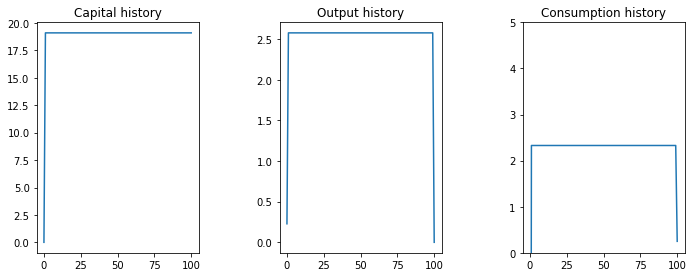

In [12]:
#Simulation

#Import packages
import numpy as np
import matplotlib.pyplot as plt
import timeit
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Set the parameters value
beta=0.988   
theta=.679
delta=.013
kappa=5.24
nu=2
start = timeit.default_timer()

# STEP 1: DISCRETIZE THE STATE SPACE. 
#Get the steady state values. h_ss=0.299
k_ss=((1/(1-theta)*((1/beta)+delta-1))**(-1/theta))*0.299
k=np.linspace(0.01,1.5*k_ss,100)#evenly spaced grid. 
z=[1.01, 1/1.01] #Shock grid

#STEP 2: Initial guess
#Define a matrix which column vectors are sequential iterations of the value function. 
V = np.empty(shape=[200, 350])
#Guess the initial column vector
V[:,0]=np.zeros((200))


#STEP 3: Feasible return matrix (M).
# Get the grid of all possible combinations of inputs. 
K1,K2 =np.meshgrid(k,k)

# Get the submatrix M for z=1.01
# Feasible combinations
def feasibility0(z1,z2):
    return (z1**(1-theta))*1.01 + (1-delta)*z1 - z2

#Evaluate the feasibility of different combinations of k_t and k_t+1.
N0 = feasibility0(K1,K2)

# Feasible utility function
def utility0(z1,z2):
    for i in range(100):
        for j in range (100):
                if N0[i,j]>=0:
                    return np.log10(z1**(1-theta)*1.01 + (1-delta)*z1 - z2)
            
#Define the feasible return matrix
M0 = utility0(K1,K2)
M0[np.isnan(M0)] = -1000

# Get the submatrix M for z=0.5/1.01
# Feasible combinations
def feasibility1(z1,z2):
    return ((z1**(1-theta))*(0.5/1.01)) + ((1-delta)*z1) - z2

#Evaluate the feasibility of different combinations of k_t and k_t+1.
N1 = feasibility1(K1,K2)

# Feasible utility function
def utility1(z1,z2):
    for i in range(100):
        for j in range (100):
                if N1[i,j]>=0:
                    return np.log10(z1**(1-theta)*(0.5/1.01) + (1-delta)*z1 - z2)
            
#Define the feasible return matrix
M1 = utility1(K1,K2)
M1[np.isnan(M1)] = -1000

#Now, stack the two submatrixes to get the stochastic return matrix M. 
M= np.vstack((M0,M1))

#STEP 4: VALUE FUNCTION MATRIX ITERATION
#Notice that since the expectation of the shock is 1, the vector V and W are the same. So we can proceed as before. 
X = np.empty(shape=[200,100])
G= np.empty(shape=[200, 350])
count=0
for s in range(0,349):
    epsilon=0.01
    for i in range(200):
        for j in range(100):
                X[i,j]=M[i,j]+(beta*V[:,s][i])        
    for i in range(0,200):
        V[:,s+1][i]= np.amax(X[i,:]) #Iteration
        G[:,s][i]=np.argmax(X[i,:]) # This line stores the policy function at each iteration. 
    for i in range(0,200):
        if abs(V[:,s+1][i]-V[:,s][i])> epsilon:
            continue
        else:
            count +=1
            break
            
#Simulate a shock history
shocks=np.random.choice([1.01,(1/1.01)],size=100,p=[0.5,0.5])
G=G[:,335]
G_good=G[0:100]
G_bad=G[100:200]
index=np.ones((100))
index[0]=0
for i in range (99): #Get the indexes of capital
    if shocks[i]==1.01:
        index[i+1]=G_good[int(index[i])]
    else:
        index[i+1]=G_bad[int(index[i])]

#Get the history of capital
kapital=np.empty(100)
for i in range(100):
    kapital[i]=k[int(index[i])]
kapital 

#History of consumption and output
output=np.empty(100)
for i in range(99):
    output[i]=pow(kapital[i],1-theta)

consumption=np.empty(100)
for i in range(99):
    consumption[i]=output[i] + (1-delta)*kapital[i] - kapital[i+1]

#PLOT
plt.figure()
time=np.linspace(0,100,100)
plt.subplot(131)
plt.plot(time,kapital)
plt.title('Capital history')

plt.subplot(132)
plt.plot(time,output)
plt.title('Output history')
#plt.xlim([0,90])

plt.subplot(133)
plt.plot(time,consumption)
plt.title('Consumption history')
plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=1.5, hspace=0.5, wspace=0.5)
plt.ylim([0,5])




We got a weird simulation. It looks like the feasibility constraint is not applying, and then, we use more resources than we have to obtain the steady state capital in the very first period and then we stay there (same thing happens to output and consumption: we reach the steady state value in the second period and we stay there). 

**Question 2.3. Filtering**

Variance of capital: 3.602101723556259
Variance of output: 0.11915140643702589
Variance of consumption: 4.458751722331993


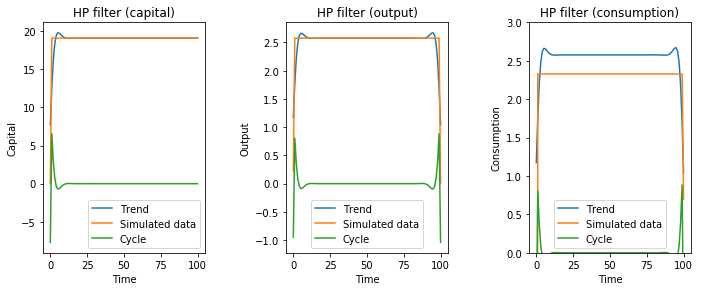

In [4]:
#FILTER
import statsmodels.api as sm
var_kapital=np.var(kapital)
var_output=np.var(output)
var_consumption=np.var(consumption)
print('Variance of capital:',var_kapital )
print('Variance of output:',var_output )
print('Variance of consumption:',var_consumption )
cycle1, trend1 = sm.tsa.filters.hpfilter(kapital, 6.25)
cycle2, trend2 = sm.tsa.filters.hpfilter(output, 6.25)
cycle3, trend3 = sm.tsa.filters.hpfilter(output, 6.25)

plt.figure()

plt.subplot(131)
plt.plot(time, trend1, label='Trend')
plt.plot(time,kapital, label='Simulated data')
plt.plot(time,cycle1, label='Cycle')
plt.legend()
plt.title('HP filter (capital)')
plt.xlabel('Time')
plt.ylabel('Capital')

plt.subplot(132)
plt.plot(time, trend2, label='Trend')
plt.plot(time,output, label='Simulated data')
plt.plot(time,cycle2, label='Cycle')
plt.legend()
plt.title('HP filter (output)')
plt.xlabel('Time')
plt.ylabel('Output')

plt.subplot(133)
plt.plot(time, trend3, label='Trend')
plt.plot(time,consumption, label='Simulated data')
plt.plot(time,cycle3, label='Cycle')
plt.legend()
plt.title('HP filter (consumption)')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.ylim([0,3])

plt.subplots_adjust(top=0.9, bottom=0.1, left=0, right=1.5, hspace=0.5, wspace=0.5)

Since the simulations got are weird, the filtering looks a bit strange as well. The only interesting thing we detect is what happens in the very first period (the only change we have in our simulated series). We should review this part of the code. No time for more. 